## Accept / Reject Monte Carlo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#this is an example distribution, feel free to change it
def p(x):
    return np.sin(x-0.5)**2 * np.exp(-x**2) + .2*np.exp(-x**2) #note, this one is not normalized pdf

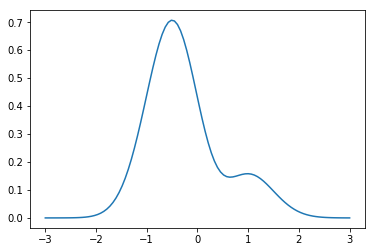

In [3]:
#let's plot it
x = np.linspace(-3,3,100)
y = p(x)
plt.plot(x,y)

## native python accept / reject

This is meant to be an easily readable implementation of the accept / reject algorithm.
It's easy to understand not very fast.

In [4]:
def accept_reject(N):
    xmin = -3
    xmax = 3
    pmax = 0.8

    n_accept=0
    x_list = [] 
    while n_accept < N:
        t = (xmax-xmin)*np.random.rand() + xmin
        y = np.random.rand()
        if y < p(t)/ pmax:
            n_accept += 1
            x_list.append(t)
    return x_list

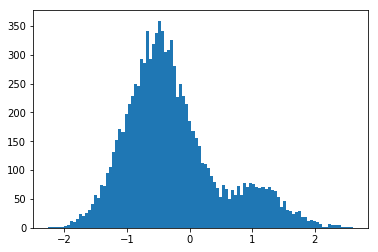

In [5]:
x = accept_reject(10000)
bins, edges, patches = plt.hist(x, bins=100)

## A faster numpy implementation

In [6]:
xmin = -3
xmax = 3
pmax = 0.8
N_MC = 100000

t = np.random.uniform(xmin,xmax,N_MC)  #get uniform temporary x values
y = np.random.uniform(0,pmax,N_MC)  # get uniform random y values

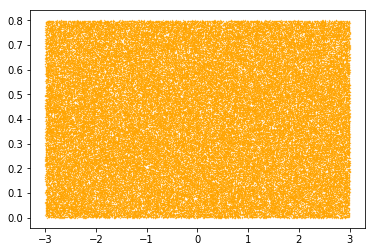

In [7]:
# plot all the t-y pairs
plt.scatter(t,y, s=0.1, c='orange')

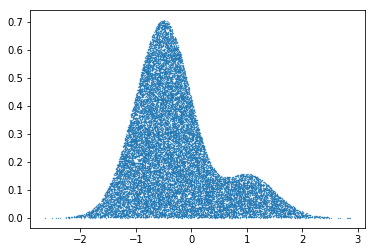

In [8]:
#make a mask that keeps index to the accepted pairs. Plot them
mask = y<p(t)
plt.scatter(t[mask],y[mask], s=0.1)

In [9]:
#inspect the mask
mask

array([False, False, False, ..., False, False, False], dtype=bool)

In [10]:
#inspect the 0th entry
t[0], y[0], p(t[0]), mask[0]

(0.5344133723538036, 0.43914651222070833, 0.15120270124751428, False)

In [11]:
#How many t's are there beore / after the mask
t.size, t[mask].size

(100000, 22015)

In [12]:
accept_prob = t[mask].size/t.size

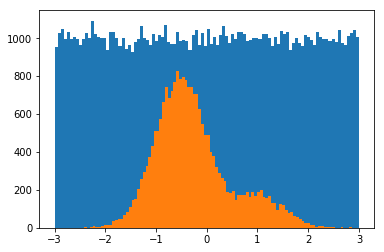

In [13]:
#histogram the t values with and without the mask
_ = plt.hist(t, bins=100)
_ = plt.hist(t[mask], bins=100)

## compare speed of the two approaches

In [18]:
%%timeit 
xmin = -3
xmax = 3
pmax = 0.8
N_MC = 100000

t = np.random.uniform(xmin,xmax,N_MC)  #get uniform temporary x values
y = np.random.uniform(0,pmax,N_MC)  # get uniform random y values
mask = y<p(t)

5.56 ms ± 71 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
%%timeit
N_MC = 100000
#for a fair comparison, we will ask accept_reject to return the same number
average_accept = N_MC*accept_prob
x = accept_reject(average_accept)

564 ms ± 94 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
#How much faster?
564/5.56

101.43884892086332